# MANUAL NET ARCHITECTURE

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [5]:
CLOUDY = 'DATASET/TRAIN/cloudy'
GREENAREA = 'DATASET/TRAIN/green_area'
SHIPSNET = 'DATASET/TRAIN/shipsnet'
WILDFIRE = 'DATASET/TRAIN/wildfire'

In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR CLOUDY:

======== Images in:  DATASET/TRAIN/cloudy
Images_count :	 333
Min_width :	 256
Max_width :	 256
Min_height :	 256
Max_height :	 256



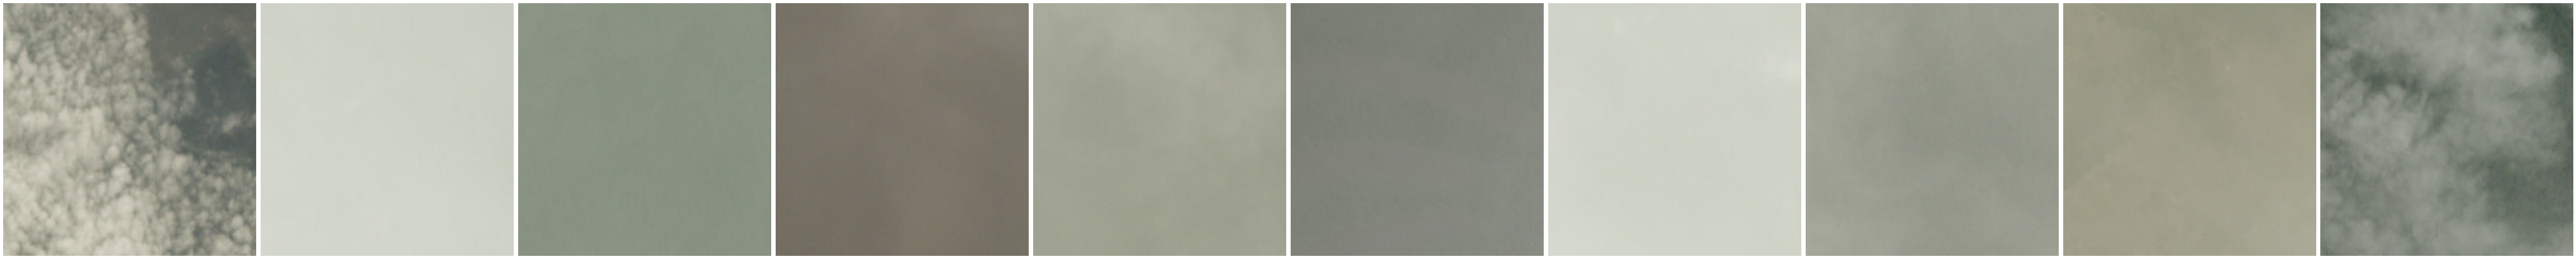

In [7]:
print("")
print("TRAINING DATA FOR CLOUDY:")
print("")
images_details(CLOUDY)
print("")
plot_images(CLOUDY, 10) 


TRAINING DATA FOR GREENAREA:

======== Images in:  DATASET/TRAIN/green_area
Images_count :	 333
Min_width :	 64
Max_width :	 64
Min_height :	 64
Max_height :	 64



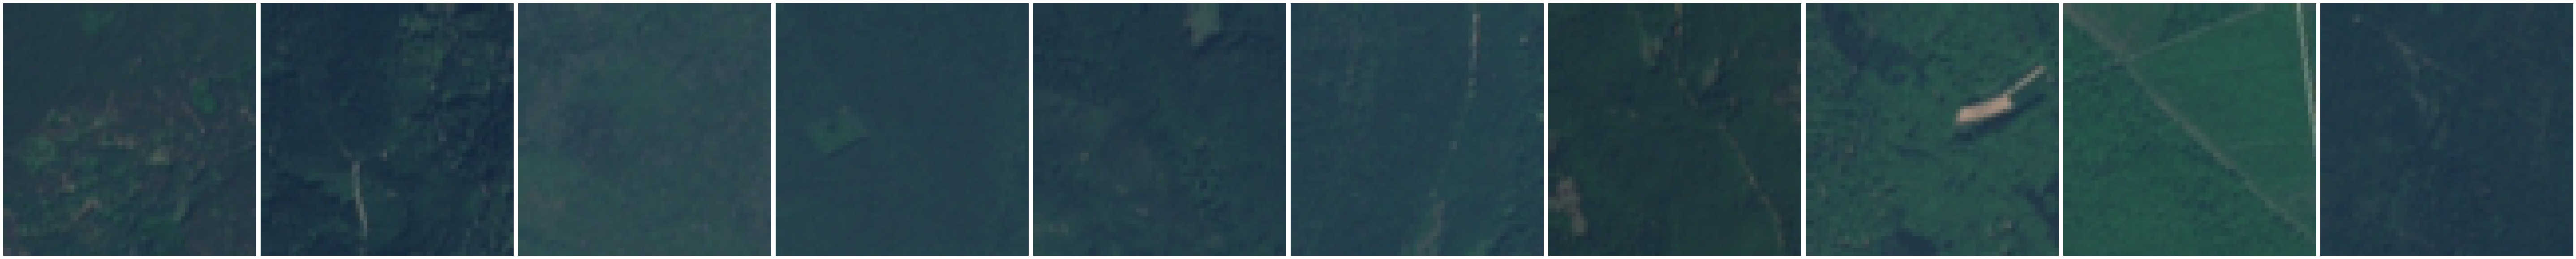

In [8]:
print("")
print("TRAINING DATA FOR GREENAREA:")
print("")
images_details(GREENAREA)
print("")
plot_images(GREENAREA, 10)


TRAINING DATA FOR SHIPSNET:

======== Images in:  DATASET/TRAIN/shipsnet
Images_count :	 331
Min_width :	 80
Max_width :	 80
Min_height :	 80
Max_height :	 80



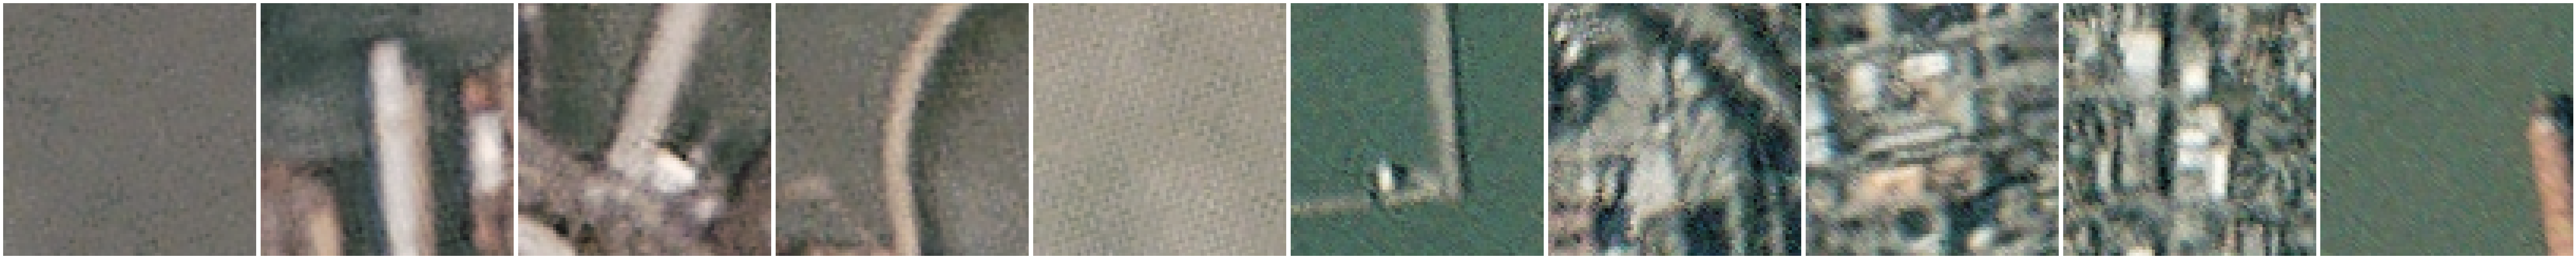

In [9]:
print("")
print("TRAINING DATA FOR SHIPSNET:")
print("")
images_details(SHIPSNET)
print("")
plot_images(SHIPSNET, 10)


TRAINING DATA FOR WILDFIRE:

======== Images in:  DATASET/TRAIN/wildfire
Images_count :	 335
Min_width :	 350
Max_width :	 350
Min_height :	 350
Max_height :	 350



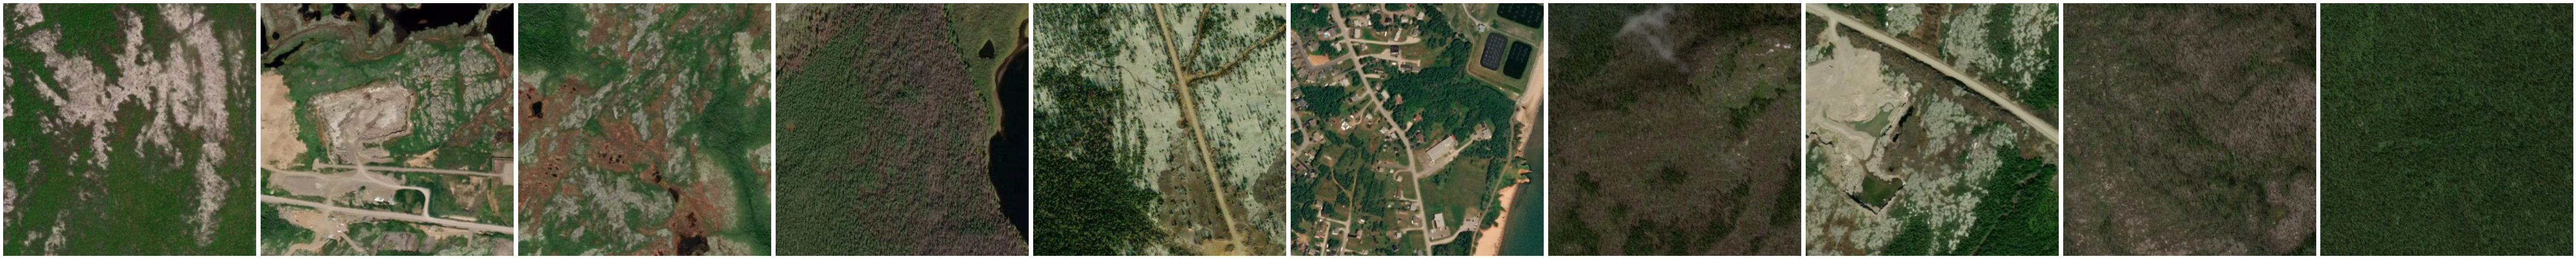

In [10]:
print("")
print("TRAINING DATA FOR WILDFIRE:")
print("")
images_details(WILDFIRE)
print("")
plot_images(WILDFIRE, 10)

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1998 images belonging to 6 classes.


In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1997 images belonging to 6 classes.


In [13]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(6, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [15]:
epochs = 100
batch_size = 512

In [16]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/100


3/3 [==============================] - ETA: 0s - loss: 41.8246 - accuracy: 0.2083
Epoch 1: accuracy improved from -inf to 0.20833, saving model to MANUAL.h5
3/3 [==============================] - 4s 1s/step - loss: 41.8246 - accuracy: 0.2083 - val_loss: 21.2556 - val_accuracy: 0.1458
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 25.3373 - accuracy: 0.1875
Epoch 2: accuracy did not improve from 0.20833
3/3 [==============================] - 3s 998ms/step - loss: 25.3373 - accuracy: 0.1875 - val_loss: 6.2163 - val_accuracy: 0.1875
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 7.0407 - accuracy: 0.2083
Epoch 3: accuracy did not improve from 0.20833
3/3 [==============================] - 3s 938ms/step - loss: 7.0407 - accuracy: 0.2083 - val_loss: 3.3996 - val_accuracy: 0.4167
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 2.6942 - accuracy: 0.4062
Epoch 4: accuracy improved from 0.20833 to 0.40625, saving model to 

Epoch 29/100
3/3 [==============================] - ETA: 0s - loss: 0.7871 - accuracy: 0.6979
Epoch 29: accuracy did not improve from 0.83333
3/3 [==============================] - 2s 805ms/step - loss: 0.7871 - accuracy: 0.6979 - val_loss: 0.7766 - val_accuracy: 0.6458
Epoch 30/100
3/3 [==============================] - ETA: 0s - loss: 1.0830 - accuracy: 0.6458
Epoch 30: accuracy did not improve from 0.83333
3/3 [==============================] - 2s 797ms/step - loss: 1.0830 - accuracy: 0.6458 - val_loss: 0.6933 - val_accuracy: 0.7188
Epoch 31/100
3/3 [==============================] - ETA: 0s - loss: 0.5415 - accuracy: 0.8438
Epoch 31: accuracy improved from 0.83333 to 0.84375, saving model to MANUAL.h5
3/3 [==============================] - 2s 872ms/step - loss: 0.5415 - accuracy: 0.8438 - val_loss: 0.6313 - val_accuracy: 0.7396
Epoch 32/100
3/3 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7821
Epoch 32: accuracy did not improve from 0.84375
3/3 [=========

3/3 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.8462
Epoch 59: accuracy did not improve from 0.85417
3/3 [==============================] - 2s 648ms/step - loss: 0.4471 - accuracy: 0.8462 - val_loss: 0.6130 - val_accuracy: 0.7708
Epoch 60/100
3/3 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.7500
Epoch 60: accuracy did not improve from 0.85417
3/3 [==============================] - 2s 797ms/step - loss: 0.6281 - accuracy: 0.7500 - val_loss: 0.4123 - val_accuracy: 0.8333
Epoch 61/100
3/3 [==============================] - ETA: 0s - loss: 0.5292 - accuracy: 0.7500
Epoch 61: accuracy did not improve from 0.85417
3/3 [==============================] - 2s 762ms/step - loss: 0.5292 - accuracy: 0.7500 - val_loss: 0.4385 - val_accuracy: 0.8542
Epoch 62/100
3/3 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.8125
Epoch 62: accuracy did not improve from 0.85417
3/3 [==============================] - 2s 767ms/step - los

3/3 [==============================] - ETA: 0s - loss: 0.4434 - accuracy: 0.8542
Epoch 89: accuracy did not improve from 0.87500
3/3 [==============================] - 2s 776ms/step - loss: 0.4434 - accuracy: 0.8542 - val_loss: 0.3783 - val_accuracy: 0.8646
Epoch 90/100
3/3 [==============================] - ETA: 0s - loss: 0.4334 - accuracy: 0.7917
Epoch 90: accuracy did not improve from 0.87500
3/3 [==============================] - 2s 754ms/step - loss: 0.4334 - accuracy: 0.7917 - val_loss: 0.5278 - val_accuracy: 0.8229
Epoch 91/100
3/3 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.7500
Epoch 91: accuracy did not improve from 0.87500
3/3 [==============================] - 2s 792ms/step - loss: 0.6245 - accuracy: 0.7500 - val_loss: 0.4384 - val_accuracy: 0.8646
Epoch 92/100
3/3 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8438
Epoch 92: accuracy did not improve from 0.87500
3/3 [==============================] - 2s 793ms/step - los

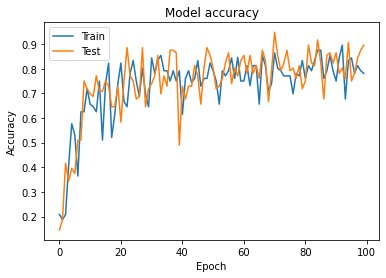

In [17]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

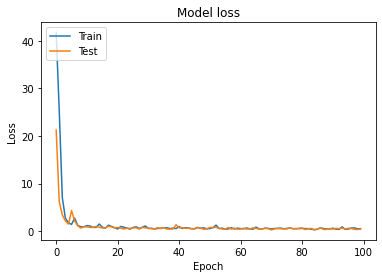

In [18]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()